##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Classificar imatges de roba

En aquesta pràctica heu de construir i entrenar un model de xarxa neuronal per classificar imatges de roba, com ara sabatilles i camisetes. 

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Importar el dataset

En aquesta pràctica usarem el conjunt de dades [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que conté 70.000 imatges en escala de grisos en 10 categories. Les imatges mostren peces de roba individuals a baixa resolució (28 per 28 píxels), com es veu aquí:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Sprite MNIST de moda" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">
    Mostres de moda-MNIST</a> (de Zalando, llicència MIT).<br/> &nbsp;
  </td></tr>
</table>

Fashion MNIST està pensat com una evolució directe del conjunt de dades clàssic [MNIST](http://yann.lecun.com/exdb/mnist/) que a vàrem emprar en aquesta mateixa assignatura.

Utilitzarem Fashion MNIST perquè presenta un problema una mica més difícil que el MNIST normal. Tots dos conjunts de dades són relativament petits i s'utilitzen per verificar que un algorisme funciona com s'esperava. Són bons punts de partida per provar i depurar codi, el que es coneix com a *base line*.

Usarem 60.000 imatges per entrenar la xarxa i 10.000 imatges per avaluar amb quina precisió la xarxa ha après a classificar les imatges. Podeu accedir al Fashion MNIST directament des de TensorFlow. Importeu i [carregueu les dades de Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directament des de TensorFlow: 

In [4]:
# Carrega de dades

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La càrrega del conjunt de dades retorna quatre matrius NumPy.

Les imatges són matrius NumPy de 28x28, amb valors de píxels que varien entre 0 i 255. Les *etiquetes* es troben en una matriu de nombres enters, que van de 0 a 9. Corresponen a la *classe* de roba que representa la imatge: 


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Evidentment, cada imatge s'assigna a una sola etiqueta. Com que els *noms de classe* no s'inclouen amb el conjunt de dades, els guardarem per utilitzar-los més tard:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar les dades:

*Quants elements té el conjunt d'entrenament? I el de test?*
*És necessari normalitzar les dades?*

Per verificar que les dades tenen el format correcte i que estan preparades per crear i entrenar la xarxa, mostrarem les primeres 25 imatges del conjunt d'entrenament i mostrarem el nom de la classe a sota de cada imatge. 

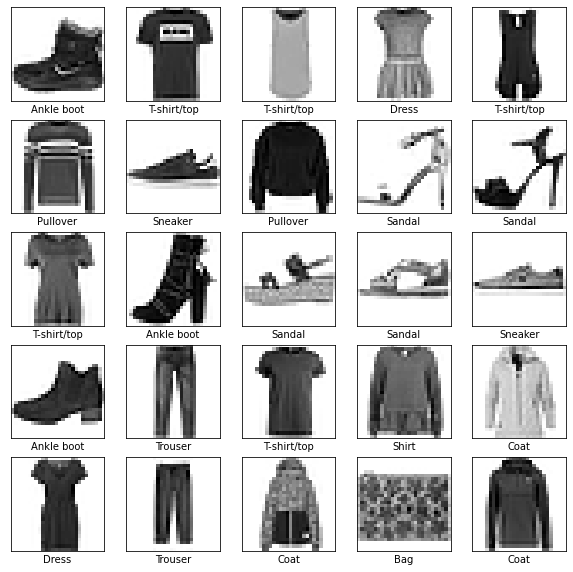

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

**Entrada**

En aquest cas tenim una capa que ens permet transformar les imatges d'una matriu 2D a una matriu unidimensional.
`tf.keras.layers.Flatten` que té el paràmetre `input_shape` el qual és una tupla amb les mides d'entrada.

Exemple: `tf.keras.layers.Flatten(input_shape=(28, 28))`

**Capes intermitges**

Es feina vostra definir quantes i com de grans seràn les capes intermitges.

**Sortida**

Degut a que tenim 10 categories la darrera capa serà una capa totalment conectada `Dense` amb 10 neurones. En aquest cas la funció d'activació no pot ser ni una funció `ReLu` ni tampoc una sigmoide.


In [7]:
# Definir el model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

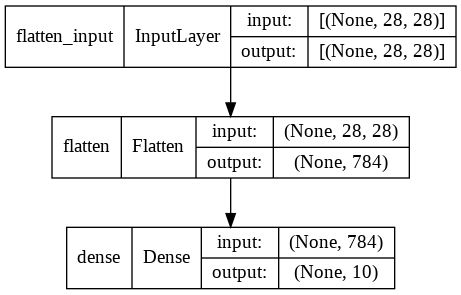

In [8]:
# Si el vostre model es diu "model" el dibuixarà
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

### Compilar el model


In [9]:
# Aquí heu de fer la compilació del model
model.compile(optimizer='adam', # també podria ser el descens de gradient tradicional
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Entrenament


In [10]:
# Entrenar
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 16.8633 - accuracy: 0.7446 - val_loss: 12.8722 - val_accuracy: 0.7873
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 12.1155 - accuracy: 0.7891 - val_loss: 20.1877 - val_accuracy: 0.7241
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.9641 - accuracy: 0.7974 - val_loss: 11.8999 - val_accuracy: 0.7835
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 11.0846 - accuracy: 0.7989 - val_loss: 11.4003 - val_accuracy: 0.8054
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 10.6864 - accuracy: 0.8013 - val_loss: 10.8557 - val_accuracy: 0.8112


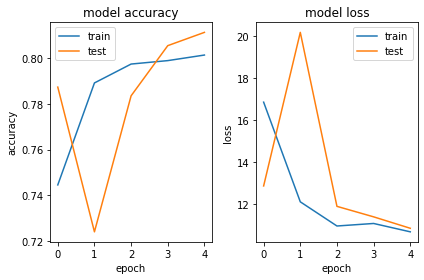

In [11]:
# Mostrar les gràfiques d'entrenament
figure, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
#ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
#ax[1].set_ylim(0,1)
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
figure.tight_layout()
plt.show()

## Avaluació


313/313 - 0s - loss: 10.8557 - accuracy: 0.8112 - 334ms/epoch - 1ms/step

Test accuracy: 0.8112000226974487


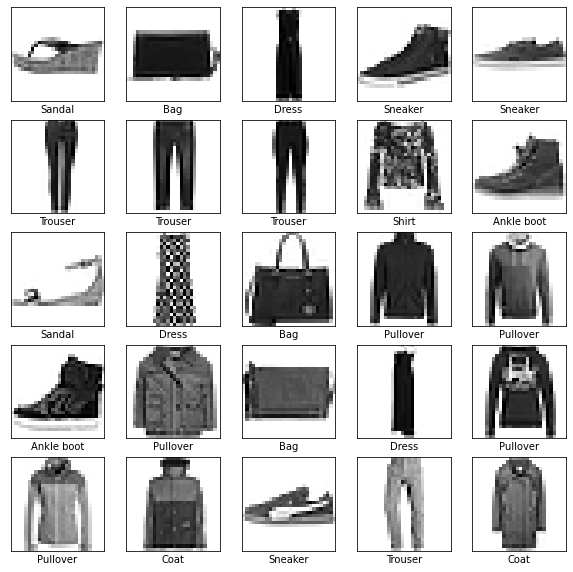

In [12]:
# Avaluar el model i veure exemples de classificació. 
# Com és la sortida de la xarxa? Com podem obtenir la classe?
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[785+i], cmap=plt.cm.binary)
    pred = np.argmax(predictions[785+i], axis=0)
    plt.xlabel(class_names[pred])
plt.show()